In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('Capston_train.csv')
train.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,01/06/2012 0:00,present,senior quality engineer,Bangalore,f,19/02/1990 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,01/09/2013 0:00,present,assistant manager,Indore,m,04/10/1989 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,01/06/2014 0:00,present,systems engineer,Chennai,f,03/08/1992 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,01/07/2011 0:00,present,senior software engineer,Gurgaon,m,05/12/1989 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,01/03/2014 0:00,01/03/2015 0:00,get,Manesar,m,27/02/1991 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
train.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [5]:
train.iloc[1,3]

'01/09/2013 0:00'

In [6]:
train['JobCity']=train['JobCity'].str.replace('-1','Others')

In [7]:
train['DOL']=train['DOL'].str.replace('present','01-12-2015 00:00')

In [8]:
train.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [9]:
train['DOL'] = pd.to_datetime(train['DOL'])
train['DOJ'] = pd.to_datetime(train['DOJ'])
train['DOB'] = pd.to_datetime(train['DOB'])
train['EXP']=train['DOL']-train['DOJ']

In [10]:
train['Age']=train['DOL']-train['DOB']
train['Age']=train['Age'].astype(str)

In [11]:
train['Experience']=((train['DOL']-train['DOJ']).map(lambda x: round(x.days/365,1)))

In [12]:
train.loc[train['collegeGPA']<=10,'collegeGPA']*=9.5

In [13]:
train['Age']=((train['DOL']-train['DOB']).map(lambda x: round(x.days/365)))

In [14]:
train['Age']=train['Age'].astype(int)
train['Experience']=train['Experience'].astype(int)

In [15]:
train.JobCity = train.JobCity.str.replace('banglore','bangalore')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bengaluru','bangalore')
train.JobCity = train.JobCity.str.replace('greater noida','noida')
train.JobCity = train.JobCity.str.replace('nouda','noida')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','noida')
train.JobCity = train.JobCity.str.replace('technopark, trivandrum','trivandrum')
train.JobCity = train.JobCity.str.replace('vizag','visakhapatnam')
train.JobCity = train.JobCity.str.replace('vsakhapttnam','visakhapatnam')
train.JobCity = train.JobCity.str.replace('thiruvananthapuram','trivandrum')
train.JobCity = train.JobCity.str.replace('ambala city','ambala')
train.JobCity = train.JobCity.str.replace('kudankulam ,tarapur','kundankulam')
train.JobCity = train.JobCity.str.replace('gaziabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('gajiabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('bhubaneswar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('bhubneshwar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('guragaon','gurgaon')
train.JobCity = train.JobCity.str.replace('gurgoan','gurgaon')
train.JobCity = train.JobCity.str.replace('kolkata`','kolkata')
train.JobCity = train.JobCity.str.replace('sonepat','sonipat')
train.JobCity = train.JobCity.str.replace('baroda','vadodara')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('pondi','pondy')
train.JobCity = train.JobCity.str.replace('punchkula','panchkula')
train.JobCity = train.JobCity.str.replace('muzzafarpur','muzaffarpur')
train.JobCity = train.JobCity.str.replace('kochi/cochin, chennai and coimbatore','kochi/cochin')
train.JobCity = train.JobCity.str.replace('nasikcity','nashik')
train.JobCity = train.JobCity.str.replace('sahibabad','shahibabad')
train.JobCity = train.JobCity.str.replace('punr','pune')
train.JobCity = train.JobCity.str.replace('tirupati','tirupathi')
train.JobCity = train.JobCity.str.replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')

train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('BAngalore','bangalore')
train.JobCity = train.JobCity.str.replace('Banglore','bangalore')
train.JobCity = train.JobCity.str.replace('BANGLORE','bangalore')
train.JobCity = train.JobCity.str.replace(' bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace('BANGALORE','bangalore')
train.JobCity = train.JobCity.str.replace('Banagalore','bangalore')
train.JobCity = train.JobCity.str.replace( 'Bengaluru','bangalore') 
train.JobCity = train.JobCity.str.replace(  'Chennai, bangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace(  'Asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'banaglore'  ,'bangalore')
train.JobCity = train.JobCity.str.replace('chennai,bangalore','bangalore')

train.JobCity = train.JobCity.str.replace( ' chennai'  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'kochi/cochin,chennai and coimbatore' ,'chennai')
train.JobCity = train.JobCity.str.replace( 'chennai '  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai & mumbai' ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai& mumbai' ,'chennai')

train.JobCity=train.JobCity.str.replace('Navi Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('THANE','mumbai')
train.JobCity = train.JobCity.str.replace('Thane','mumbai')
train.JobCity = train.JobCity.str.replace('Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace(' mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('NAVI MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace('Navi Mumbai , Hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('thane','mumbai')
train.JobCity = train.JobCity.str.replace('Khopoli','mumbai')
train.JobCity = train.JobCity.str.replace('Navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai ','mumbai')
train.JobCity = train.JobCity.str.replace('Navimumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , Hyderabad','mumbai')

train.JobCity = train.JobCity.str.replace('hyderabad(bhadurpally)','hyderabad')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('Hyderabad ','hyderabad')
train.JobCity = train.JobCity.str.replace( 'navi mumbai , hyderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('hyderabad ' ,'hyderabad')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('greater noida','new delhi')
train.JobCity = train.JobCity.str.replace('nouda','new delhi')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('gaziabaad','new delhi')
train.JobCity = train.JobCity.str.replace('gajiabaad','new delhi')
train.JobCity = train.JobCity.str.replace('ghaziabad','new delhi')
train.JobCity = train.JobCity.str.replace('guragaon','new delhi')
train.JobCity = train.JobCity.str.replace('gurgoan','new delhi')
train.JobCity = train.JobCity.str.replace('gurgaon','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi - jaisalmer','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi ','new delhi')
train.JobCity = train.JobCity.str.replace(' new delhi','new delhi')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('maharajganj','north zone')

train.JobCity = train.JobCity.str.replace( 'rewari','north zone')
train.JobCity = train.JobCity.str.replace('panchkula','north zone')
train.JobCity = train.JobCity.str.replace('lucknow','north zone')
train.JobCity = train.JobCity.str.replace('una','north zone')
train.JobCity = train.JobCity.str.replace('kanpur ','north zone')
train.JobCity = train.JobCity.str.replace('faridabad','north zone')
train.JobCity = train.JobCity.str.replace('haridwar','north zone')
train.JobCity = train.JobCity.str.replace( 'unnao','north zone')
train.JobCity = train.JobCity.str.replace('dehradun','north zone')
train.JobCity = train.JobCity.str.replace('rudrapur','north zone')
train.JobCity = train.JobCity.str.replace('dharamshala','north zone')
train.JobCity = train.JobCity.str.replace('hissar','north zone')
train.JobCity = train.JobCity.str.replace('gurga','north zone')
train.JobCity = train.JobCity.str.replace('chandigarh','north zone')
train.JobCity = train.JobCity.str.replace('pantnagar','north zone')
train.JobCity = train.JobCity.str.replace( 'lucknow ','north zone')
train.JobCity = train.JobCity.str.replace('ludhiana','north zone')
train.JobCity = train.JobCity.str.replace( 'muzaffarnagar','north zone')
train.JobCity = train.JobCity.str.replace('gagret','north zone')
train.JobCity = train.JobCity.str.replace('indirapuram,new delhi','north zone')
train.JobCity = train.JobCity.str.replace('bareli','north zone')
train.JobCity = train.JobCity.str.replace('kanpur','north zone')
train.JobCity = train.JobCity.str.replace('dharuhera','north zone')
train.JobCity = train.JobCity.str.replace('meerut','north zone')
train.JobCity = train.JobCity.str.replace('agra','north zone')
train.JobCity = train.JobCity.str.replace('rohtak','north zone')
train.JobCity = train.JobCity.str.replace('jaspur','north zone')
train.JobCity = train.JobCity.str.replace('shimla','north zone')
train.JobCity = train.JobCity.str.replace('jammu','north zone')
train.JobCity = train.JobCity.str.replace( 'jhajjar','north zone')
train.JobCity = train.JobCity.str.replace('nalagarh','north zone')
train.JobCity = train.JobCity.str.replace( 'chandigarh ','north zone')
train.JobCity = train.JobCity.str.replace('joshimath','north zone')
train.JobCity = train.JobCity.str.replace('bathinda','north zone')
train.JobCity = train.JobCity.str.replace('kala amb ','north zone')
train.JobCity = train.JobCity.str.replace('karnal','north zone')
train.JobCity = train.JobCity.str.replace('baddi hp','north zone')
train.JobCity = train.JobCity.str.replace('bahadurgarh','north zone')
train.JobCity = train.JobCity.str.replace('varanasi','north zone')
train.JobCity = train.JobCity.str.replace( 'shahibabad','north zone')
train.JobCity = train.JobCity.str.replace('ambala','north zone')
train.JobCity = train.JobCity.str.replace( 'roorkee','north zone')
train.JobCity = train.JobCity.str.replace('allahabad','north zone')
train.JobCity = train.JobCity.str.replace('panchkula ','north zone')
train.JobCity = train.JobCity.str.replace('jalandhar','north zone')
train.JobCity = train.JobCity.str.replace('phagwara','north zone')
train.JobCity = train.JobCity.str.replace('yamuna nagar','north zone')
train.JobCity = train.JobCity.str.replace('sampla','north zone')
train.JobCity = train.JobCity.str.replace('mainpuri','north zone')
train.JobCity = train.JobCity.str.replace('rae bareli','north zone')
train.JobCity = train.JobCity.str.replace( 'patiala','north zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','north zone')
train.JobCity = train.JobCity.str.replace( 'rajpura','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('bhubaneshwar','east zone')
train.JobCity = train.JobCity.str.replace('dhanbad','east zone')
train.JobCity = train.JobCity.str.replace('bhagalpur','east zone')
train.JobCity = train.JobCity.str.replace('bankura','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('jamshedpur','east zone')
train.JobCity = train.JobCity.str.replace('ranchi','east zone')
train.JobCity = train.JobCity.str.replace('siliguri','east zone')
train.JobCity = train.JobCity.str.replace('angul','east zone')
train.JobCity = train.JobCity.str.replace('jowai','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('ganjam','east zone')
train.JobCity = train.JobCity.str.replace('chandrapur','east zone')
train.JobCity = train.JobCity.str.replace('patna','east zone')
train.JobCity = train.JobCity.str.replace('jaspur','east zone')
train.JobCity = train.JobCity.str.replace('burdwan','east zone')
train.JobCity = train.JobCity.str.replace('east zone ','east zone')
train.JobCity = train.JobCity.str.replace('nagari','east zone')
train.JobCity = train.JobCity.str.replace('orissa','east zone')
train.JobCity = train.JobCity.str.replace('durgapur','east zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','east zone')
train.JobCity = train.JobCity.str.replace('howrah','east zone')
train.JobCity = train.JobCity.str.replace('bihar','east zone')
train.JobCity = train.JobCity.str.replace('baripada','east zone')
train.JobCity = train.JobCity.str.replace('guwahati','east zone')
train.JobCity = train.JobCity.str.replace('rourkela','east zone')
train.JobCity = train.JobCity.str.replace('haldia','east zone')

train.JobCity = train.JobCity.str.replace('mangalore','south zone')
train.JobCity = train.JobCity.str.replace('mysore','south zone')
train.JobCity = train.JobCity.str.replace('trivandrum' ,'south zone')
train.JobCity = train.JobCity.str.replace('coimbatore' ,'south zone')
train.JobCity = train.JobCity.str.replace('visakhapatnam','south zone')
train.JobCity = train.JobCity.str.replace('kochi/cochin','south zone')
train.JobCity = train.JobCity.str.replace('mysore ','south zone')
train.JobCity = train.JobCity.str.replace('kochi','south zone')
train.JobCity = train.JobCity.str.replace('tirupathi' ,'south zone')
train.JobCity = train.JobCity.str.replace('tirunelvelli' ,'south zone')
train.JobCity = train.JobCity.str.replace('tornagallu' ,'south zone')
train.JobCity = train.JobCity.str.replace('madurai' ,'south zone')
train.JobCity = train.JobCity.str.replace('cheyyar','south zone')
train.JobCity = train.JobCity.str.replace(' ariyalur' ,'south zone')
train.JobCity = train.JobCity.str.replace('calicut','south zone')
train.JobCity = train.JobCity.str.replace('miryalaguda','south zone')
train.JobCity = train.JobCity.str.replace('trichy','south zone')
train.JobCity = train.JobCity.str.replace('kundankulam','south zone')
train.JobCity = train.JobCity.str.replace('ongole','south zone')
train.JobCity = train.JobCity.str.replace('ernakulam','south zone')
train.JobCity = train.JobCity.str.replace('muvattupuzha','south zone')
train.JobCity = train.JobCity.str.replace('orissa','south zone')
train.JobCity = train.JobCity.str.replace('mettur, tamil nadu ','south zone')
train.JobCity = train.JobCity.str.replace('kurnool','south zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','south zone')
train.JobCity = train.JobCity.str.replace('nellore','south zone')
train.JobCity = train.JobCity.str.replace('vellore','south zone')
train.JobCity = train.JobCity.str.replace('pondycherry','south zone')
train.JobCity = train.JobCity.str.replace('secunderabad','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('hubli','south zone')
train.JobCity = train.JobCity.str.replace('kakinada','south zone')
train.JobCity = train.JobCity.str.replace('gulbarga','south zone')
train.JobCity = train.JobCity.str.replace('pondy','south zone')
train.JobCity = train.JobCity.str.replace('keral','south zone')
train.JobCity = train.JobCity.str.replace('bellary','south zone')
train.JobCity = train.JobCity.str.replace('hospete','south zone')
train.JobCity = train.JobCity.str.replace('vandavasi','south zone')
train.JobCity = train.JobCity.str.replace('salem','south zone')
train.JobCity = train.JobCity.str.replace('dharmapuri','south zone')
train.JobCity = train.JobCity.str.replace('belgaum','south zone')
train.JobCity = train.JobCity.str.replace('nagari','south zone')
train.JobCity = train.JobCity.str.replace('trichur','south zone')

train.JobCity = train.JobCity.str.replace('indore','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal','Central Zone')
train.JobCity = train.JobCity.str.replace('raigarh','Central Zone')
train.JobCity = train.JobCity.str.replace('jabalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('jagdalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('gwalior','Central Zone')
train.JobCity = train.JobCity.str.replace('bareli','Central Zone')
train.JobCity = train.JobCity.str.replace('bilaspur','Central Zone')
train.JobCity = train.JobCity.str.replace('shahdol','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal ','Central Zone')
train.JobCity = train.JobCity.str.replace('bhilai','Central Zone')
train.JobCity = train.JobCity.str.replace('singaruli','Central Zone')

train.JobCity = train.JobCity.str.replace('Jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('ahmedabad','West Zone')
train.JobCity = train.JobCity.str.replace('nagpur','West Zone')
train.JobCity = train.JobCity.str.replace('nashik','West Zone')
train.JobCity = train.JobCity.str.replace('kolhapur','West Zone')
train.JobCity = train.JobCity.str.replace('rajasthan','West Zone')
train.JobCity = train.JobCity.str.replace('bhiwadi','West Zone')
train.JobCity = train.JobCity.str.replace('rajkot','West Zone')
train.JobCity = train.JobCity.str.replace('daman and diu','West Zone')
train.JobCity = train.JobCity.str.replace('gandhi nagar','West Zone')
train.JobCity = train.JobCity.str.replace('beawar','West Zone')
train.JobCity = train.JobCity.str.replace('alwar','West Zone')
train.JobCity = train.JobCity.str.replace('jodhpur','West Zone')
train.JobCity = train.JobCity.str.replace('udaipur','West Zone')
train.JobCity = train.JobCity.str.replace('aurangabad','West Zone')
train.JobCity = train.JobCity.str.replace('neemrana','West Zone')
train.JobCity = train.JobCity.str.replace('ahmednagar','West Zone')
train.JobCity = train.JobCity.str.replace('gandhinagar','West Zone')
train.JobCity = train.JobCity.str.replace('sadulpur','West Zone')
train.JobCity = train.JobCity.str.replace('chandrapur','West Zone')
train.JobCity = train.JobCity.str.replace('nanded','West Zone')
train.JobCity = train.JobCity.str.replace('jaspur','West Zone')
train.JobCity = train.JobCity.str.replace('bharuch','West Zone')
train.JobCity = train.JobCity.str.replace('ratnagiri','West Zone')
train.JobCity = train.JobCity.str.replace('jamnagar','West Zone')
train.JobCity = train.JobCity.str.replace('kota','West Zone')
train.JobCity = train.JobCity.str.replace('surat','West Zone')
train.JobCity = train.JobCity.str.replace('khopoli','West Zone')
train.JobCity = train.JobCity.str.replace('vapi','West Zone')
train.JobCity = train.JobCity.str.replace('pilani','West Zone')
train.JobCity = train.JobCity.str.replace('dausa','West Zone')
train.JobCity = train.JobCity.str.replace('latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('karad','West Zone')
train.JobCity = train.JobCity.str.replace('bundi','West Zone')
train.JobCity = train.JobCity.str.replace('vadodara','West Zone')
train.JobCity = train.JobCity.str.replace( 'mohali','north zone')

train.JobCity = train.JobCity.str.replace('muzaffarpur','east zone')
train.JobCity = train.JobCity.str.replace('visakhaeast zonem','east zone')
train.JobCity = train.JobCity.str.replace('vijayawada','south zone')
train.JobCity = train.JobCity.str.replace('raipur','Central Zone')
train.JobCity = train.JobCity.str.replace( 'bulandshahar','north zone')
train.JobCity = train.JobCity.str.replace( 'sonipat','north zone')
train.JobCity = train.JobCity.str.replace('sambalpur','east zone')
train.JobCity = train.JobCity.str.replace('bikaner','West Zone')
train.JobCity = train.JobCity.str.replace(  'gonda','north zone')
train.JobCity = train.JobCity.str.replace('kharagpur','east zone')
train.JobCity = train.JobCity.str.replace(  'yamnorth zone nagar','north zone')

train.JobCity = train.JobCity.str.replace(  'manesar','north zone')
train.JobCity = train.JobCity.str.replace(  'jhansi','north zone')
train.JobCity = train.JobCity.str.replace(   'rae north zone','north zone')
train.JobCity = train.JobCity.str.replace(   'north zone ','north zone')
train.JobCity = train.JobCity.str.replace('south zone ','south zone')
train.JobCity = train.JobCity.str.replace( 'West Zone ','West Zone')
train.JobCity = train.JobCity.str.replace('Central Zone ','Central Zone')
train.JobCity = train.JobCity.str.replace( 'latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('india','Central Zone')

train.JobCity = train.JobCity.str.replace( 'australia','Abroad')
train.JobCity = train.JobCity.str.replace( 'dubai','Abroad')
train.JobCity = train.JobCity.str.replace( 'am','Abroad')
train.JobCity = train.JobCity.str.replace( 'al jubail,saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'kalmar, sweden','Abroad')
train.JobCity = train.JobCity.str.replace( 'jeddah saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'johannesburg','Abroad')
train.JobCity = train.JobCity.str.replace(  'london','Abroad')
train.JobCity = train.JobCity.str.replace(  'ras al khaimah','Abroad')
train.JobCity = train.JobCity.str.replace( 'dammam','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')

In [16]:
train.JobCity = train.JobCity.str.replace('pune ' ,'pune')

train.JobCity = train.JobCity.str.replace('asansol' ,'kolkata')

In [17]:
train.JobCity = train.JobCity.str.replace( ' pune','pune')

In [18]:
train.Specialization = train.Specialization.str.replace('computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science & engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer application' ,'computers')
train.Specialization = train.Specialization.str.replace('electronics and computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science and technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer and communication engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information & communication technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science' ,'computers')
train.Specialization = train.Specialization.str.replace('computer networking' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science' ,'computers')

train.Specialization = train.Specialization.str.replace('electronics and communication engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & telecommunications' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('applied electronics and instrumentation' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & instrumentation eng' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and instrumentation engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('embedded systems technology' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical and power engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('mechatronics' ,'etrx')
train.Specialization = train.Specialization.str.replace('telecommunication engineering','etrx')
train.Specialization = train.Specialization.str.replace('electronics' ,'etrx')

train.Specialization = train.Specialization.str.replace('mechanical engineering','mech')
train.Specialization = train.Specialization.str.replace('mechanical and automation','mech')
train.Specialization = train.Specialization.str.replace('metallurgical engineering','mech')
train.Specialization = train.Specialization.str.replace('ceramic engineering','mech')
train.Specialization = train.Specialization.str.replace('mechatronics','mech')
train.Specialization = train.Specialization.str.replace('mechanical & production engineering','mech')
train.Specialization = train.Specialization.str.replace('internal combustion engine','mech')

In [19]:
train.Specialization = train.Specialization.str.replace('industrial & production engineering','mech')
train.Specialization = train.Specialization.str.replace('automobile/automotive engineering','mech')
train.Specialization = train.Specialization.str.replace('industrial engineering','mech')
train.Specialization = train.Specialization.str.replace('power systems and automation','mech')
train.Specialization = train.Specialization.str.replace('industrial & management engineering','mech')

train.Specialization = train.Specialization.str.replace('control and instrumentation engineering','instrumentation engineering')
train.Specialization = train.Specialization.str.replace('polymer technology','chemical engineering')

In [20]:
train.Specialization = train.Specialization.str.replace('etrx and computers' ,'etrx')

In [21]:
train = train[((train.GraduationYear != 2016)&(train.GraduationYear != 2017)&(train.GraduationYear != 0))]

In [22]:
train.loc[(train.Salary<=100000),'Salary']*=12

In [23]:
train['English']=((train['English']*100)/875)
train['Quant']=((train['Quant']*100)/900)
train['Logical']=((train['Logical']*100)/795)

In [24]:
train1=train['English']+train['Quant']+train['Logical']
train['Cognitive Test Scores']=train1/3


In [25]:
train=train.drop(columns=['Logical','English','Quant'])

In [26]:
train['Domain']=train['Domain'].replace(to_replace=-1,value=0.622643)

In [27]:
list10=[] #cleaning and classification process for 10 Board feature
for i in train['10board']:
    if ('icse' in i):
        list10.append('ICSE')
    elif('cbse' in i):
        list10.append('CBSE')
    elif('central board of secondary education' in i):
        list10.append('CBSE')
    elif('delhi' in i):
        list10.append('CBSE')
    elif('cbsc' in i):
        list10.append('CBSE')
    else:
        list10.append('State Board')
train['10 Board']=list10
train['10 Board'].value_counts()    

State Board    2291
CBSE           1409
ICSE            282
Name: 10 Board, dtype: int64

In [28]:
list1=[]
for i in train['12board']:
    if ('isc' in i):
        list1.append('ISC')
    elif('cbse' in i):
        list1.append('CBSE')
    elif('nios' in i):
        list1.append('National Board')
    elif('diploma' in i):
        list1.append('Diploma')
    elif('technical' in i):
        list1.append('Technical')
    elif('university' in i):
        list1.append('University')
    else:
        list1.append('State Board')
train['12 Board']=list1
train['12 Board'].value_counts()

State Board       2480
CBSE              1392
ISC                 48
University          32
Technical           15
Diploma              8
National Board       7
Name: 12 Board, dtype: int64

In [29]:
train['Personality Trait Score']=((train['conscientiousness']+train['agreeableness']+train['extraversion']+train['nueroticism']+train['openess_to_experience'])/5)
train['Personality Trait Score'].head() #all personality traits scores were added and clubbed together to get a final personality score value

0    0.644560
1    0.328220
2    0.390060
3   -0.256000
4   -0.453574
Name: Personality Trait Score, dtype: float64

In [30]:
l=[]
for i in train['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')


In [31]:
train['Designations']=l
train['Designations'].value_counts()

engineer      1987
developer      665
others         537
analyst        401
manager        122
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designations, dtype: int64

In [32]:
train=train.drop(columns=['10board','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience','Unnamed: 0','DOJ', 'DOL','Designation', 'DOB','CollegeID','CollegeState','ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','EXP'],axis=1)
train.columns

Index(['ID', 'Salary', 'JobCity', 'Gender', '10percentage', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear',
       'Domain', 'Age', 'Experience', 'Cognitive Test Scores', '10 Board',
       '12 Board', 'Personality Trait Score', 'Designations'],
      dtype='object')

In [33]:
train.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,420000.0,Bangalore,f,84.3,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,3,63.591794,State Board,State Board,0.644560,others
1,579905,500000.0,Indore,m,85.4,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,26,2,80.941599,CBSE,CBSE,0.328220,manager
2,810601,325000.0,Chennai,f,85.0,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,23,1,59.983428,CBSE,CBSE,0.390060,engineer
3,267447,1100000.0,Gurgaon,m,85.6,2007,83.6,cbse,1,B.Tech/B.E.,...,1,2011,0.974396,26,4,71.866926,CBSE,CBSE,-0.256000,others
4,343523,200000.0,Manesar,m,78.0,2008,76.8,cbse,2,B.Tech/B.E.,...,0,2012,0.124502,24,1,64.189578,CBSE,CBSE,-0.453574,others


In [34]:
q3=train['Salary'].quantile(.75)
q2=train['Salary'].quantile(.25)
q1=q3-q2
q4=q3+1.5*q1
q5=q2-1.5*q1

In [35]:
train=train[train['Salary']<q4]
train=train[train['Salary']>q5]
train.shape

(3675, 23)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [ ]:
X= train[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = train['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

In [ ]:
lr_mdl = LinearRegression()
lr_mdl.fit(x_train,y_train) 

y_pred = lr_mdl.predict(x_test)

print("*** Linear Regression ***")
print("Train R-squared: ", lr_mdl.score(x_train,y_train))
print("Test R-squared: ", lr_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
lr_mdl = LinearRegression()

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr_mdl.fit(x_train,y_train) 

y_pred = lr_mdl.predict(x_test)

print("*** Linear Regression ***")
print("Train R-squared: ", lr_mdl.score(x_train,y_train))
print("Test R-squared: ", lr_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
svm_mdl = svm.SVR()
svm_mdl.fit(x_train,y_train) 

y_pred = svm_mdl.predict(x_test)

print("*** SVR - RBF ***")
print("Train R-squared: ", svm_mdl.score(x_train,y_train))
print("Test R-squared: ", svm_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
rf_mdl = RandomForestRegressor(n_estimators = 1500,max_features='sqrt')
rf_mdl.fit(x_train,y_train) 

y_pred = rf_mdl.predict(x_test)

print("*** Random Forest Regressor ***")
print("Train R-squared: ", rf_mdl.score(x_train,y_train))
print("Test R-squared: ", rf_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
svr_mdl = svm.LinearSVR()
svr_mdl.fit(x_train,y_train) 

y_pred = svr_mdl.predict(x_test)

print("*** Linear SVR ***")
print("Train R-squared: ", svr_mdl.score(x_train,y_train))
print("Test R-squared: ", svr_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
lasso_mdl = linear_model.Lasso(alpha=0.01, selection="random", random_state=1)
lasso_mdl.fit(x_train,y_train) 

y_pred = lasso_mdl.predict(x_test)

print("*** Lasso ***")
print("Train R-squared: ", lasso_mdl.score(x_train,y_train))
print("Test R-squared: ", lasso_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
log_mdl = linear_model.LogisticRegression()
log_mdl.fit(x_train,y_train) 

y_pred = log_mdl.predict(x_test)

print("*** Logistic ***")
print("Train R-squared: ", log_mdl.score(x_train,y_train))
print("Test R-squared: ", log_mdl.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.30,random_state=1)

In [91]:
lin2 = LinearRegression() 
lin2.fit(x_train,y_train) 

y_pred = lin2.predict(x_test)

print("*** Linear Regression - Polynomial Features ***")
print("Train R-squared: ", lin2.score(x_train,y_train))
print("Test R-squared: ", lin2.score(x_test,y_test))

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

*** Linear Regression - Polynomial Features ***
Train R-squared:  0.9996777334043889
Test R-squared:  -44707876.31313571
MAE:  106543749.58506611
MSE:  6.639529263321514e+17
RMSE:  814833066.5431733


## Let's try to modify this as a classification problem by creating 3 bins from salary columns ##

In [36]:
def sal(x):
    if x > 1000000:
        return 'High packg'
    elif x > 500000 and x <= 1000000:
        return 'Good packg'
    elif x > 350000 and x <= 500000:
        return 'Average packg'
    else:
        return 'Low packg'

In [37]:
df = train.copy()
df.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,420000.0,Bangalore,f,84.30,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,3,63.591794,State Board,State Board,0.644560,others
1,579905,500000.0,Indore,m,85.40,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,26,2,80.941599,CBSE,CBSE,0.328220,manager
2,810601,325000.0,Chennai,f,85.00,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,23,1,59.983428,CBSE,CBSE,0.390060,engineer
4,343523,200000.0,Manesar,m,78.00,2008,76.8,cbse,2,B.Tech/B.E.,...,0,2012,0.124502,24,1,64.189578,CBSE,CBSE,-0.453574,others
5,1027655,300000.0,Hyderabad,m,89.92,2010,87.0,state board,2,B.Tech/B.E.,...,0,2014,0.622643,23,1,67.566737,State Board,State Board,-0.964100,engineer


In [38]:
df['Salary'] = df['Salary'].astype("float")

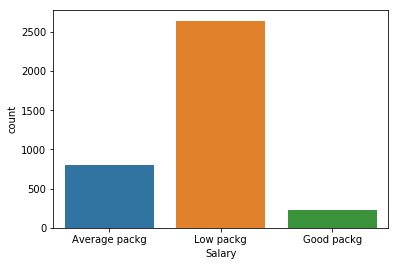

In [39]:
from sklearn.preprocessing import LabelEncoder
df['Salary'] = df['Salary'].apply(sal)
import seaborn as sns
sns.countplot(df['Salary'])

In [40]:
lc = LabelEncoder()
df['Salary'] = lc.fit_transform(df['Salary'])
df.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,0,Bangalore,f,84.30,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,3,63.591794,State Board,State Board,0.644560,others
1,579905,0,Indore,m,85.40,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,26,2,80.941599,CBSE,CBSE,0.328220,manager
2,810601,2,Chennai,f,85.00,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,23,1,59.983428,CBSE,CBSE,0.390060,engineer
4,343523,2,Manesar,m,78.00,2008,76.8,cbse,2,B.Tech/B.E.,...,0,2012,0.124502,24,1,64.189578,CBSE,CBSE,-0.453574,others
5,1027655,2,Hyderabad,m,89.92,2010,87.0,state board,2,B.Tech/B.E.,...,0,2014,0.622643,23,1,67.566737,State Board,State Board,-0.964100,engineer


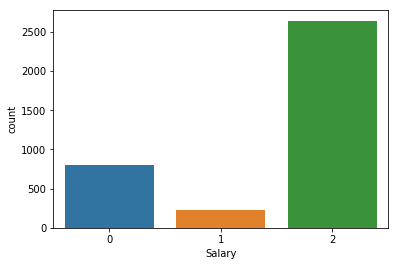

In [41]:
sns.countplot(df['Salary'])

In [48]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

                 Feature       Score
4             Experience  393.698182
3                    Age  133.547502
5  Cognitive Test Scores   71.498432
7           12percentage   48.985219
6           10percentage   39.984559
0             collegeGPA   36.752839
1            CollegeTier   20.287027
2        CollegeCityTier    0.392723


# Model Building

## Null Accuracy

In [159]:
y_test.value_counts()

2    808
0    227
1     68
Name: Salary, dtype: int64

In [160]:
# Null Accuracy
#---------------
avg_pckg  = y_test.value_counts()[0]
good_pckg = y_test.value_counts()[1]
low_pckg  = y_test.value_counts()[2]
print("Data points with Average Package    : ", avg_pckg)
print("Data points with Good Package       : ", good_pckg)
print("Data points with Low Package        : ", low_pckg)
print("---------------------NULL ACCURACY---------------------------")
print(y_test.value_counts().head(1) / len(y_test))

Data points with Average Package    :  227
Data points with Good Package       :  68
Data points with Low Package        :  808
---------------------NULL ACCURACY---------------------------
2    0.732548
Name: Salary, dtype: float64


## Logistic Regression

In [51]:
# train a Simple logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [53]:
# calculate accuracy
accuracy = []
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.786038077969175


In [164]:
y_test.dtype

dtype('int64')

In [54]:
## To Build Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91   0 136]
 [ 41   0  27]
 [ 31   1 776]]


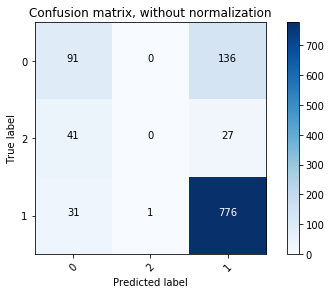

In [55]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## KNN (K Nearest Neighbours)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier()

# weights :  optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [57]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
# For every test data point, letspredict it's label based on 4 nearest neighbours in this model. T
# The majority class will be assigned to the test data point

y_pred_class = NNH.predict(x_test)

In [59]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7162284678150499


Confusion matrix, without normalization
[[ 66   9 152]
 [ 22   3  43]
 [ 83   4 721]]


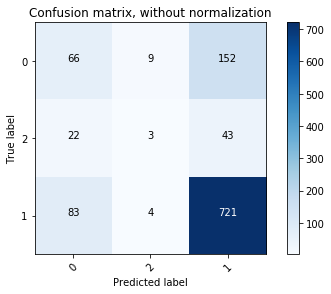

In [60]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Naive Bayes

In [61]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [62]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_pred_class = clf.predict(x_test)

In [64]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7443336355394379


Confusion matrix, without normalization
[[107  22  98]
 [ 36  13  19]
 [ 84  23 701]]


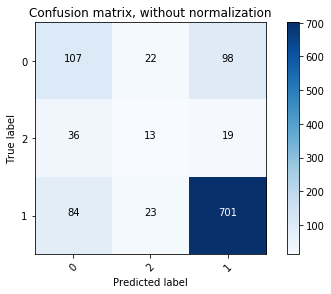

In [65]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## SVM - Linear Model

In [66]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='linear', gamma= 0.2)
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [68]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7960108794197642


Confusion matrix, without normalization
[[114   0 113]
 [ 45   0  23]
 [ 44   0 764]]


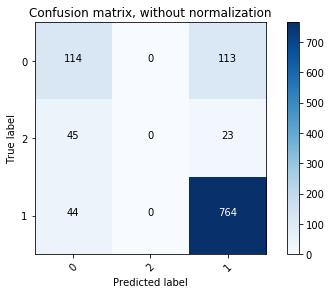

In [69]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## SVM - RBF Model

In [70]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='rbf', gamma=0.2)
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [72]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.729827742520399


Confusion matrix, without normalization
[[  0   0 227]
 [  0   0  68]
 [  3   0 805]]


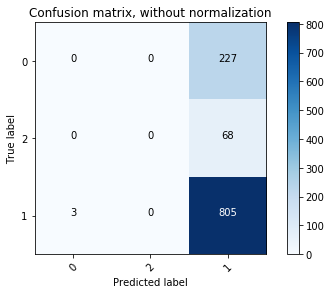

In [73]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Decision Trees

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred_class = dt_model.predict(x_test)

In [76]:
accuracy.append(dt_model.score(x_test, y_test))
dt_model.score(x_test, y_test)  

0.658204895738894

Confusion matrix, without normalization
[[ 92  26 109]
 [ 28  11  29]
 [148  37 623]]


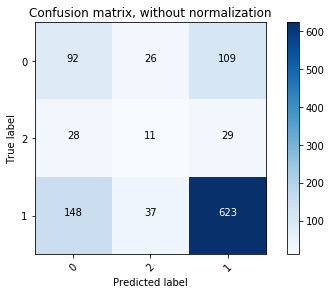

In [77]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Ensemble Learning - Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
#bgcl = BaggingClassifier(n_estimators=9 , max_samples=.7)
bgcl = bgcl.fit(x_train, y_train)

In [79]:
y_pred_class = bgcl.predict(x_test)
accuracy.append(bgcl.score(x_test, y_test))
bgcl.score(x_test, y_test)

0.7579329102447869

Confusion matrix, without normalization
[[104  11 112]
 [ 31  12  25]
 [ 81   7 720]]


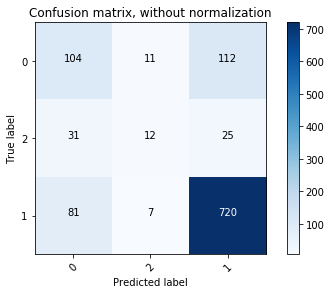

In [80]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Ensemble Learning - AdaBoosting

In [81]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(x_train, y_train)

In [82]:
y_pred_class = abcl.predict(x_test)
accuracy.append(abcl.score(x_test, y_test))
abcl.score(x_test, y_test)

0.7787851314596554

Confusion matrix, without normalization
[[125  10  92]
 [ 39  12  17]
 [ 80   6 722]]


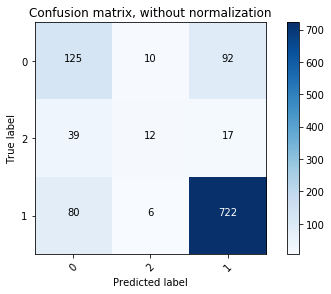

In [83]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Ensemble Learning - GradientBoost

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)

In [85]:
y_pred_class = gbcl.predict(x_test)
accuracy.append(gbcl.score(x_test, y_test))
gbcl.score(x_test, y_test)

0.7787851314596554

Confusion matrix, without normalization
[[102   9 116]
 [ 35   6  27]
 [ 51   6 751]]


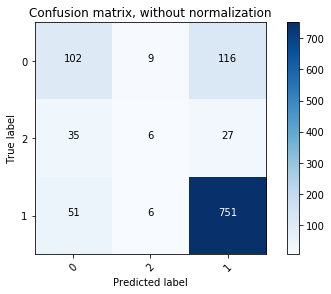

In [86]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

## Ensemble RandomForest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [88]:
y_pred_class = rfcl.predict(x_test)
accuracy.append(rfcl.score(x_test, y_test))
rfcl.score(x_test, y_test)

0.7651858567543064

Confusion matrix, without normalization
[[104  10 113]
 [ 31  10  27]
 [ 74   4 730]]


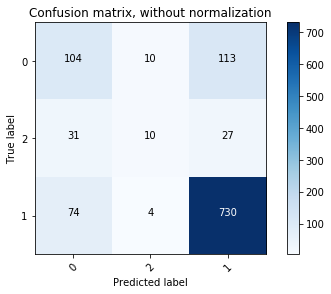

In [89]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

In [90]:
models = ["Logistic","KNN", "Naive_bayes","SVM_Linear","SVM_RBF","Decision_Tree","Bagging","AdaBoost","GradBoost","Random_Forest"]

In [91]:
accuracy

[0.786038077969175,
 0.7162284678150499,
 0.7443336355394379,
 0.7960108794197642,
 0.729827742520399,
 0.658204895738894,
 0.7579329102447869,
 0.7787851314596554,
 0.7787851314596554,
 0.7651858567543064]

In [206]:
def eg3_lc(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }

In [211]:
eg3_lc(models, accuracy)

{'Logistic': 0.786038077969175,
 'KNN': 0.7162284678150499,
 'Naive_bayes': 0.7443336355394379,
 'SVM_Linear': 0.7960108794197642,
 'SVM_RBF': 0.729827742520399,
 'Decision_Tree': 0.6663644605621033,
 'Bagging': 0.7588395285584769,
 'AdaBoost': 0.7787851314596554,
 'GradBoost': 0.7796917497733454,
 'Random_Forest': 0.7642792384406165}

In [ ]:
Logistic","KNN", "Naive_bayes","SVM_Linear","SVM_RBF","Decision_Tree","Bagging","AdaBoost","GradBoost","Random_Forest

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection

C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LR: 0.769527 (0.018731)
KNN: 0.702863 (0.016893)
CART: 0.665585 (0.029251)


C:\Python SO\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change 

RFC: 0.750208 (0.020635)
GBC: 0.770334 (0.023363)
ADA: 0.769795 (0.021918)
Bag: 0.746128 (0.027647)
NB: 0.741783 (0.025505)


C:\Python SO\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Python SO\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

SVM: 0.719455 (0.020285)


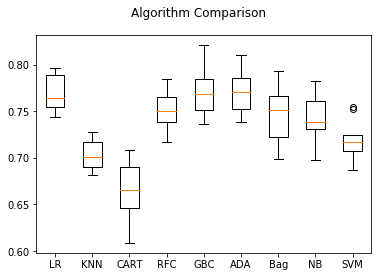

In [100]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('Bag', BaggingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
seed=7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()